# Sales Prediction using Machine Learning

## Objective
The objective of this project is to predict product sales based on
advertising expenditure on TV, Radio, and Newspaper using a machine
learning approach.

This project demonstrates data analysis, exploratory data analysis (EDA),
and the use of Linear Regression for prediction.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


  1. EDA

## Loading the Dataset
The dataset contains advertising expenditure on different media
platforms along with the corresponding sales values.


In [3]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.size

1000

In [7]:
df.shape[0]

200

In [8]:
df.shape[1]

5

In [9]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [10]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [12]:
df.notnull().sum()

,0
Unnamed: 0,200
TV,200
Radio,200
Newspaper,200
Sales,200


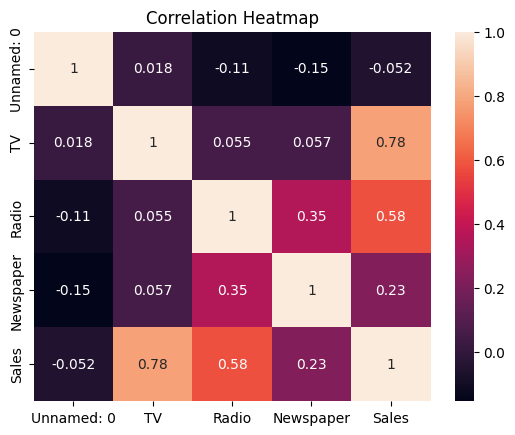

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [14]:
df.corr()['Sales'].sort_values(ascending=False)


,Sales
Sales,1.000000
TV,0.782224
Radio,0.576223
Newspaper,0.228299
Unnamed: 0,-0.051616


### Observation
TV advertising has the strongest positive correlation with sales,
followed by Radio. Newspaper advertising shows comparatively
less influence on sales.


2. Feature Selection And Data Split .

In [20]:
X = df[['TV', 'Radio', 'Newspaper']]
Y= df['Sales']


In [21]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


## Train-Test Split
The dataset is split into training and testing sets to evaluate
the model on unseen data and avoid overfitting.


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [29]:
X_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [30]:
X_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [31]:
Y_test

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7
115,12.6
69,22.3
170,8.4
174,11.5
45,14.9


In [32]:
Y_train

,Sales
79,11.0
197,12.8
38,10.1
24,9.7
122,11.6
...,...
106,7.2
14,19.0
92,19.4
179,12.6


Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression

sales_model = LinearRegression()
sales_model.fit(X_train, Y_train)


LinearRegression()

Prediction

In [36]:
Y_pred = sales_model.predict(X_test)
Y_pred


array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

Model Evaluation

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error Value is : ", mse)
print("R2 Score value is : ", r2)


Mean Squared Error: 3.1740973539761033
R2 Score: 0.899438024100912


Data Visualization

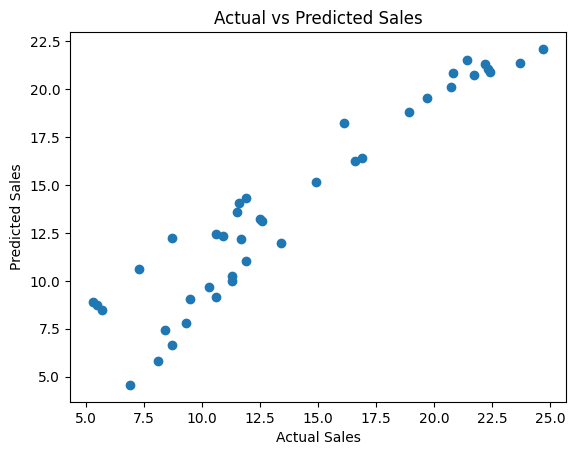

In [40]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


Regression Graph With Straight Line

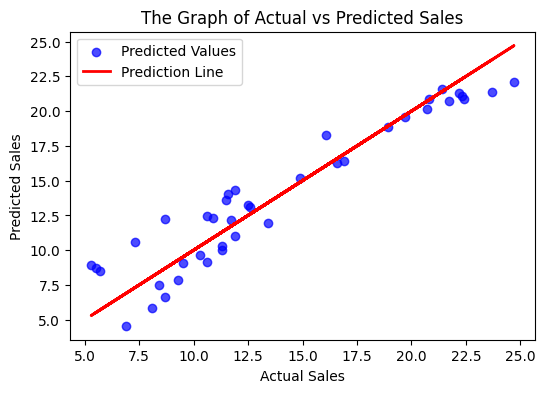

In [44]:
plt.figure(figsize=(6,4))

# Scatter points (Predicted vs Actual)
plt.scatter(Y_test,Y_pred,color="blue",alpha=0.7,label="Predicted Values")
plt.plot(Y_test,Y_test,color="red", linewidth=2,label="Prediction Line")

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("The Graph of Actual vs Predicted Sales")
plt.legend()
plt.show()




The blue points are closely aligned with the red reference line,
indicating that the Linear Regression model predicts sales values
with reasonable accuracy.
